**Покупка площади (парсинг Авито)**

In [1]:
import requests
from bs4 import BeautifulSoup
import re
#ссылка вручную обработана так, чтобы результаты были только для станций метро, которые нам нужны
url = 'https://www.avito.ru/moskva/kommercheskaya_nedvizhimost/prodam/drugoe-ASgBAgICAkSwCNJWnsMNhtk5?f=ASgBAgECA0SwCNJW8hKg2gGeww2G2TkBRbQTFXsiZnJvbSI6MjAwLCJ0byI6MzAwfQ&metro=4-6-10-11-13-16-18-21-30-32-41-42-45-48-50-52-54-57-60-64-66-72-73-75-79-80-82-90-92-97-99-109-114-116-117-118-122-124-126-134-137-138-139-1006-1007-2001'
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})  #избегаем ошибки 403, это подсказал GPT
soup = BeautifulSoup(response.content, 'html.parser')

price_elements = soup.find_all('p', {'class':"styles-module-root-s4tZ2 styles-module-size_s-nEvE8 styles-module-size_s-PDQal stylesMarningNormal-module-root-_xKyG stylesMarningNormal-module-paragraph-s-HX94M styles-module-noAccent-XIvJm"}) #ищем нужные элементы по классу
weird_prices = [] #список необработанных данных

def process_price(weird_prices_text):
    weird_prices_text = weird_prices_text.replace('\u202f', '').replace('\xa0', '') #приводим текст в божеский вид
    return weird_prices_text
prices =[]
for element in price_elements:
    weird_prices_text = element.get_text()
    processed_price = process_price(weird_prices_text)
    prices.append(processed_price)

print(prices)

['283646₽за м²', '3 дня назад', '57 завершённых объявлений', '283646₽за м²', '3 дня назад', '43 завершённых объявления', '179545₽за м²', '19 августа 2024', '70 завершённых объявлений', '200000₽за м²', 'Вчера', '26 завершённых объявлений', '56682₽за м²', '8 апреля 2024', '362 завершённых объявления', '173643₽за м²', '27 декабря 2024', '26 завершённых объявлений', '294872₽за м²', '24 октября 2024', '570 завершённых объявлений', '128096₽за м²', '13 февраля 19:01', '298842₽за м²', '9 ноября 2022', '225000₽за м²', '1 неделю назад', '89 завершённых объявлений', '243309₽за м²', '20 января 15:16', '12 завершённых объявлений', '418182₽за м²', '12 февраля 03:33', '121489 завершённых объявлений', '97800₽за м²', '20 июля 2023', '77402₽за м²', '28 декабря 2024', '89 завершённых объявлений', '766667₽за м²', '26 ноября 2024', '3149 завершённых объявлений', '1948574₽за м²', '2 недели назад', '1074 завершённых объявления', '50808₽за м²', '27 февраля 2024', '362 завершённых объявления', '21277₽за м²', '

In [2]:
#в список prices попадает очень много мусора, который я не смогла убрать с помощью более точного поиска, поэтому просто отдельно обрабатывает список
prices_per_sqeare = [price for price in prices if "м²" in price]

cleaned_prices = []
for price in prices_per_sqeare: #убирает лишнее и оставляет только число - стоимость аренды за м²
    numbers = re.findall(r'\d+', price.replace(' ', ''))
    cleaned_price = int(numbers[0])
    cleaned_prices.append(cleaned_price)
print(cleaned_prices)

[283646, 283646, 179545, 200000, 56682, 173643, 294872, 128096, 298842, 225000, 243309, 418182, 97800, 77402, 766667, 1948574, 50808, 21277, 98425, 325150, 185777, 323655, 162698, 105960, 306306, 218978, 672430, 54403, 149947, 184418, 276000, 52083, 341667, 555556, 110345, 234899, 265444, 625857, 228856, 64378, 360000, 383199, 313653, 191720, 318160, 443801, 170543, 453686, 148077, 400000]


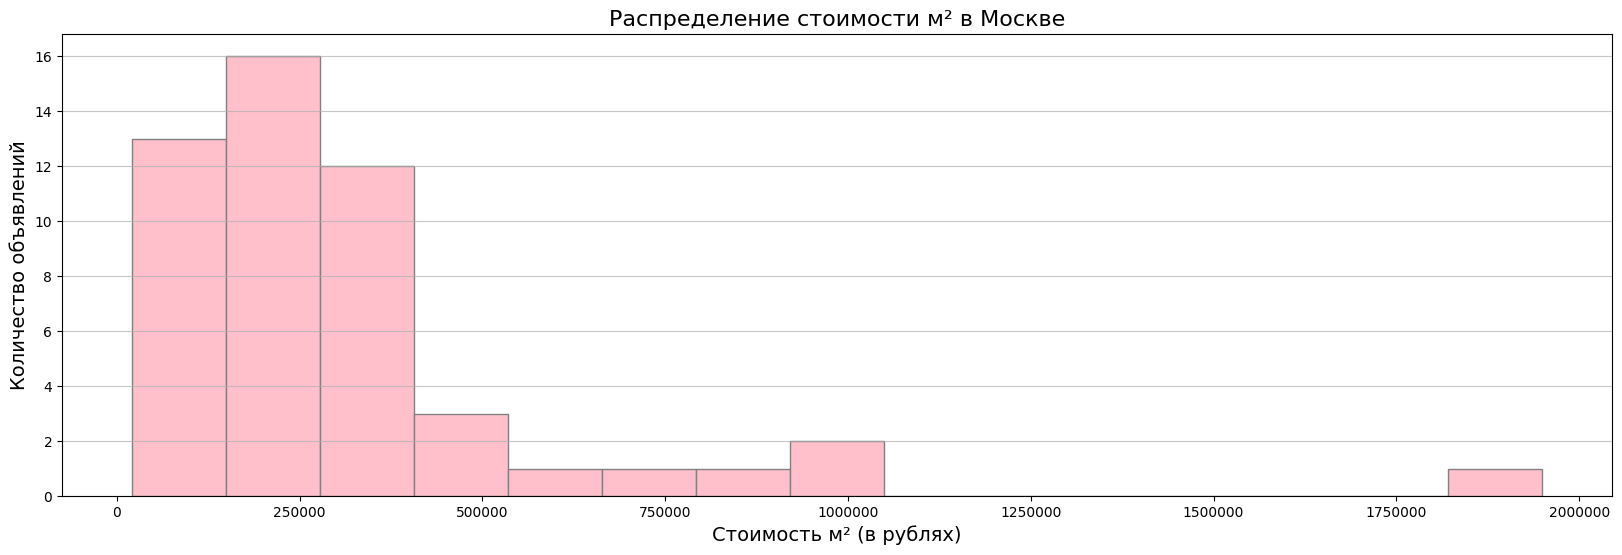

In [3]:
#не всегда авито давал возможность парсинга, поэтому для того, чтобы график точно всегда работал, я добавила в него спаршенные в какую-то из сессий числа 🙏🏻
cleaned_prices = [200000, 330739, 173643, 294872, 179545, 56682, 128096, 225000, 243309, 77402, 283646, 283646, 1948574, 50808, 21277, 98425, 323655, 185777, 105960, 218978, 306306, 672430, 54403, 149947, 184418, 276000, 52083, 555556, 341667, 234899, 265444, 360000, 228856, 64378, 500000, 418182, 313653, 191720, 77678, 97800, 443801, 170543, 1048951, 148077, 400000, 350000, 965724, 197067, 817499, 373320]
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 6))
plt.hist(cleaned_prices, bins=15, color='pink', edgecolor='gray', alpha=1)

plt.title('Распределение стоимости м² в Москве', fontsize=16)
plt.xlabel('Стоимость м² (в рублях)', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.ticklabel_format(axis='x', style='plain')

plt.show()

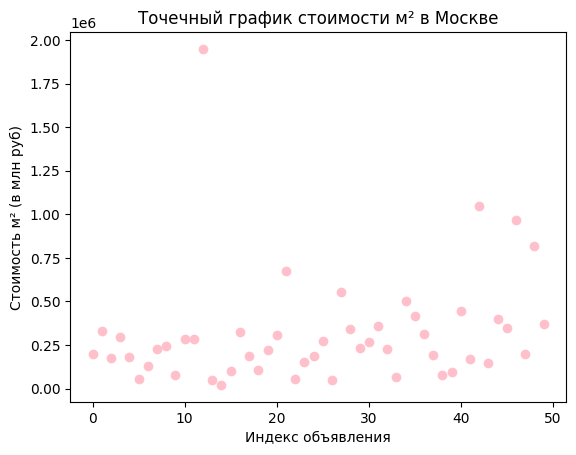

In [4]:
import seaborn as sns
plt.scatter(range(len(cleaned_prices)), cleaned_prices, color='pink', alpha=1)
plt.title('Точечный график стоимости м² в Москве')
plt.xlabel('Индекс объявления')
plt.ylabel('Стоимость м² (в млн руб)')
plt.show()

In [ ]:
#Вывод: аренда одного м² в Москве в нужных нам местах обойдется скорее всего в 250000 рублей